# 1. Radar Plot Ratings Subplots

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
A  0.227459  0.258197  0.776639  0.274227  0.308489  0.262605  0.270833   
B  0.682377  0.756148  0.303279  0.389691  0.296066  0.579832  0.437500   
C  0.331967  0.409836  0.795082  0.781443  0.795031  0.777311  0.883333   
D  0.934426  1.000000  0.647541  0.936082  0.973085  0.878151  0.943750   
E  0.297131  0.284836  0.729508  0.342268  0.267081  0.338235  0.304167   

   Rating 8  Rating 9  Rating 10  
A  0.220833  0.241237   0.383197  
B  0.962500  0.661856   0.655738  
C  0.466667  0.424742   0.288934  
D  0.585417  0.927835   0.938525  
E  0.245833  0.282474   0.282787  


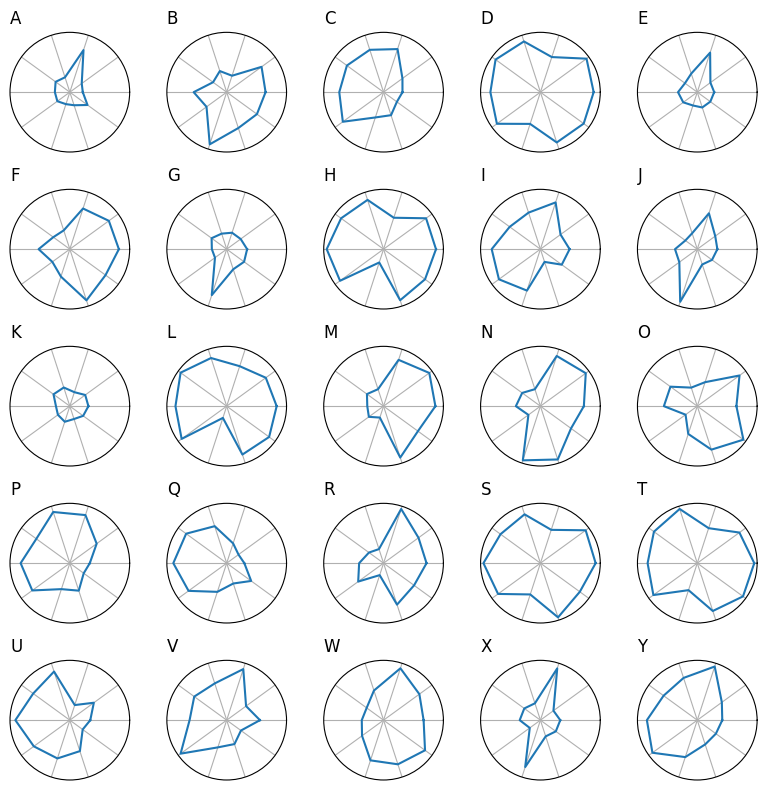

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

normalised_data = ratings / ratings.max()
print(normalised_data.head())

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in normalised_data.index:
    # values = normalised_data.transpose()[name].values.flatten().tolist()
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(5, 5, counter, polar=True)
    sub.plot(angles, values)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels([])
    sub.set_title(name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

# 2. Bar Chart Ratings Sorted

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64


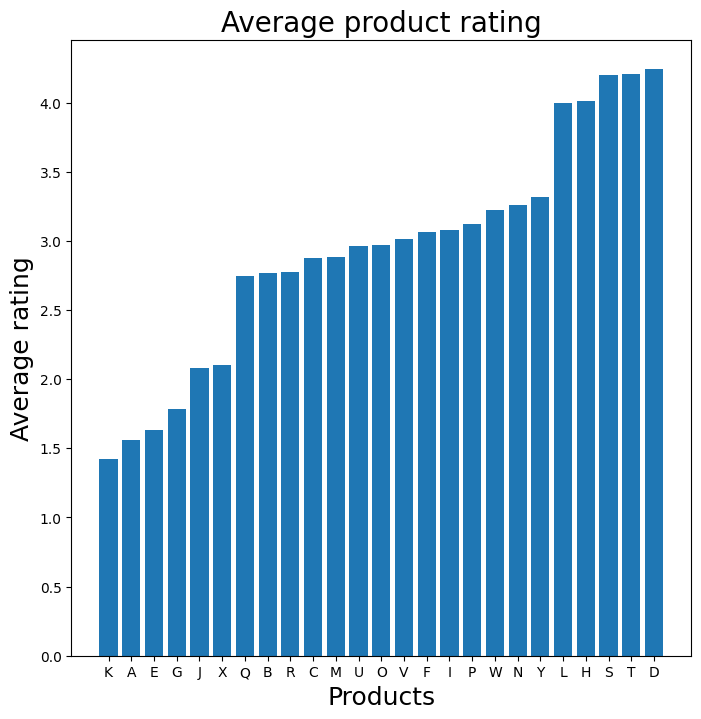

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

data = ratings.transpose()
data = data.reindex(data.sum().sort_values().index, axis=1)

# data.sum().plot.bar(width=0.8, rot=0, figsize=(8, 8))
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.mean(), align='center')
plt.xticks(x_pos, data.columns)
plt.xlabel('Products', fontsize=18)
plt.ylabel('Average rating', fontsize=18)
plt.title('Average product rating', fontsize=20)
plt.show()

# 3. t-SNE Ratings Default

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64


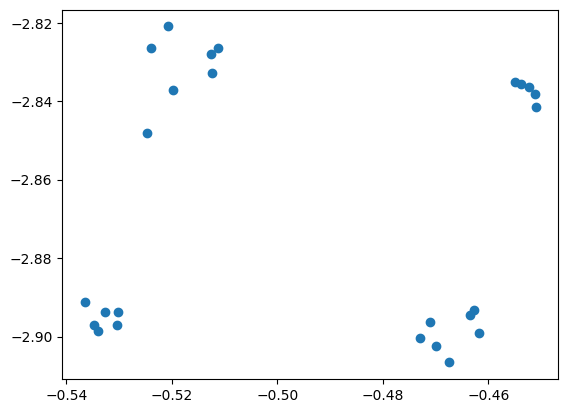

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

raw_data = ratings
n_samples = raw_data.shape[0]
perplexity = min(30, n_samples - 1)  # Ensure perplexity < n_samples

embedding = TSNE(n_components=2, perplexity=perplexity, random_state=0).fit_transform(raw_data.values)
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1])
for i, name in enumerate(raw_data.index):
    plt.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
plt.show()

# 4. t-SNE Ratings Varying Perplexity

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64


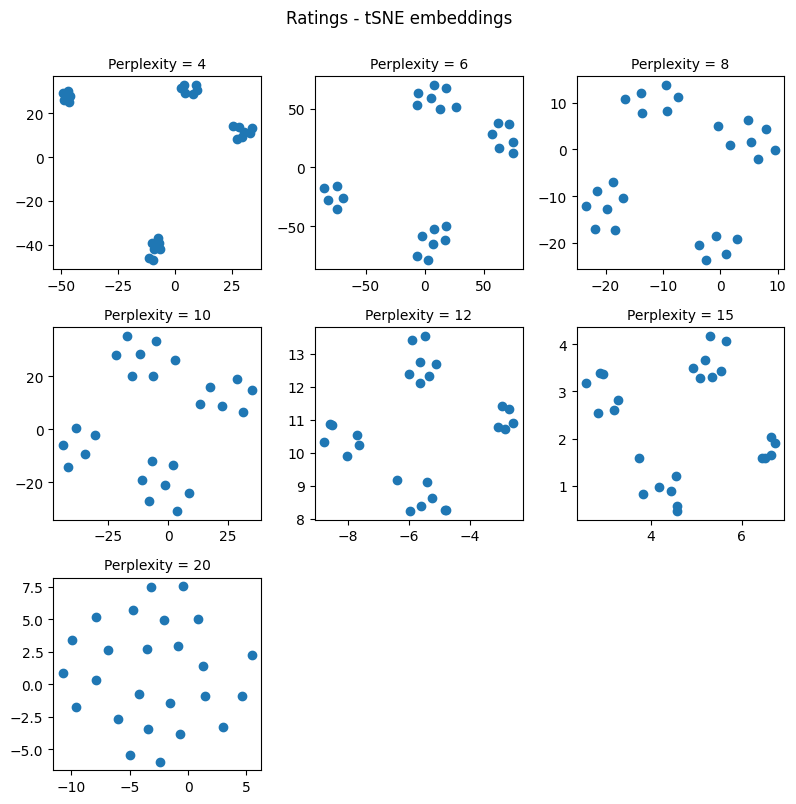

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

raw_data = ratings
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ratings - tSNE embeddings',  position=(0.5, 1.0))
perplexities = [4, 6, 8, 10, 12, 15, 20, 25, 30]
n_samples = raw_data.shape[0]
max_perplexity = n_samples - 1  # Ensure perplexity < n_samples

# Adjust the range of perplexity values
perplexities = [p for p in [4, 6, 8, 10, 12, 15, 20, 25, 30] if p < max_perplexity]

for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(raw_data.values)
    sub = fig.add_subplot(3, 3, counter)
    sub.set_title(f'Perplexity = {p}', fontsize=10)
    plt.scatter(embedding[:, 0], embedding[:, 1])
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

# 5. t-SNE Low Ratings

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
K      1.59      1.63      1.26      1.67      1.71      1.16      1.24   
A      1.11      1.26      3.79      1.33      1.49      1.25      1.30   
E      1.45      1.39      3.56      1.66      1.29      1.61      1.46   
G      1.75      1.48      1.48      1.39      1.58      1.24      1.22   
J      1.72      1.90      3.23      1.42      1.25      1.86      1.87   
X      1.70      1.38      4.66      1.51      1.69      1.73      1.11   
B      3.33      3.69      1.48      1.89      1.43      2.76      2.10   
C      1.62      2.00      3.88      3.79      3.84      3.70      4.24   
D      4.56      4.88      3.16    

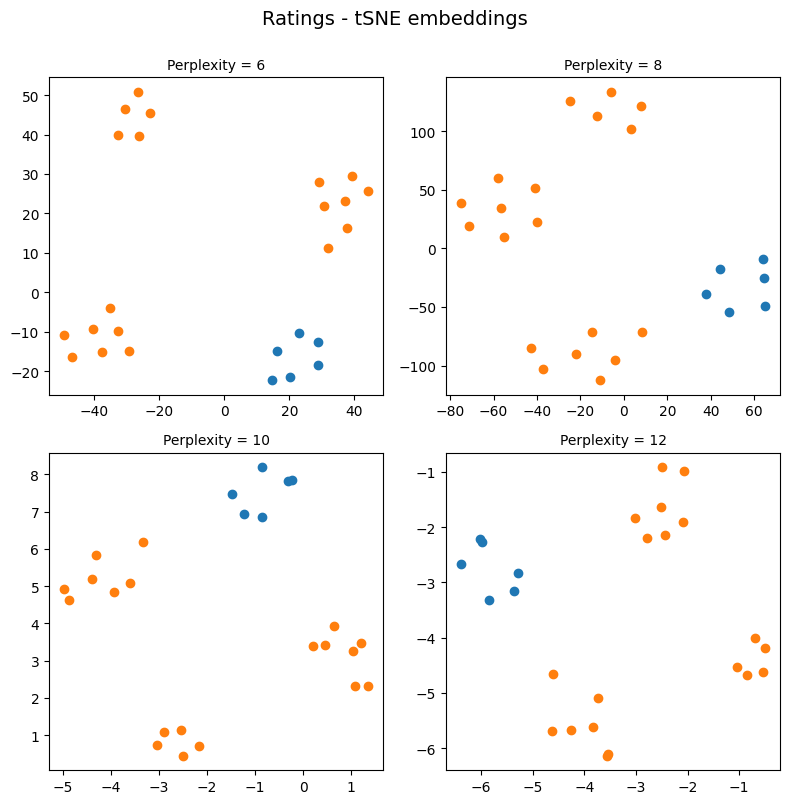

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

raw_data = ratings
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
group = ['K', 'A', 'E', 'G', 'J', 'X']

raw_data_group = raw_data.loc[group]
group_size = raw_data_group.shape[0]
raw_data_other = raw_data.drop(group)
grouped_data = pd.concat([raw_data_group, raw_data_other])
print(grouped_data)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ratings - tSNE embeddings', fontsize=14, position=(0.5, 1.0))
perplexities = [6, 8, 10, 12]
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(grouped_data.values)
    embedded_group = embedding[:group_size, :]
    embedded_other = embedding[group_size:, :]
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title(f'Perplexity = {p}', fontsize=10)
    sub.scatter(embedded_group[:, 0], embedded_group[:, 1])
    sub.scatter(embedded_other[:, 0], embedded_other[:, 1])
    # for i, name in enumerate(normalised_data.index):
    #     sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

# 6. t-SNE High Ratings

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
L      4.28      4.14      3.60      4.31      4.83      4.28      4.69   
H      4.49      4.50      2.83      4.41      4.45      4.75      4.53   
S      4.73      4.79      3.00      4.37      4.18      4.76      4.41   
T      4.88      4.46      3.15      4.85      4.54      4.15      4.57   
D      4.56      4.88      3.16      4.54      4.70      4.18      4.53   
A      1.11      1.26      3.79      1.33      1.49      1.25      1.30   
B      3.33      3.69      1.48      1.89      1.43      2.76      2.10   
C      1.62      2.00      3.88      3.79      3.84      3.70      4.24   
E      1.45      1.39      3.56    

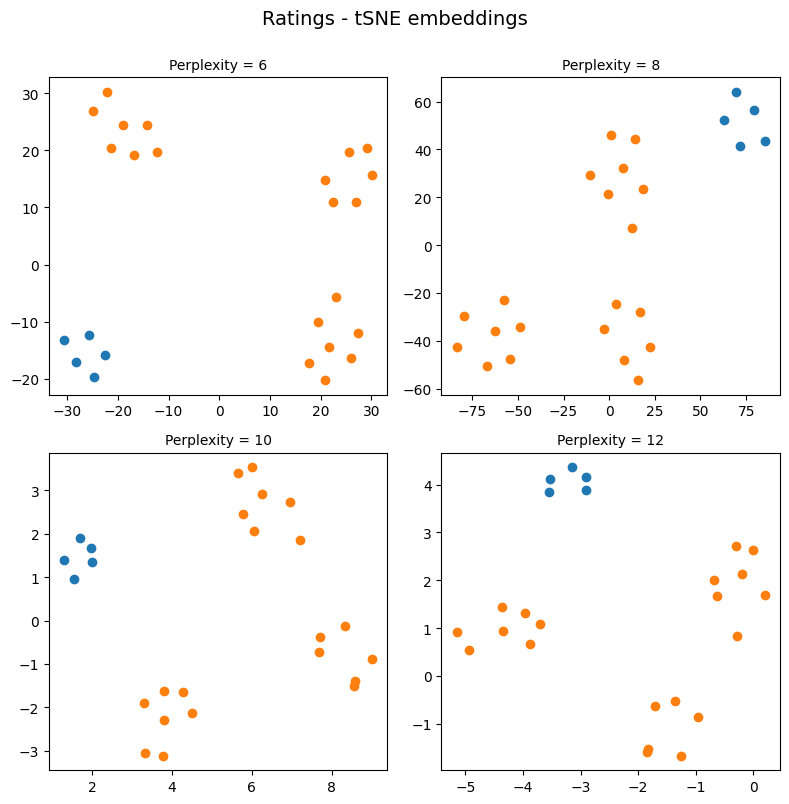

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

raw_data = ratings
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
group = ['L', 'H', 'S', 'T', 'D']

raw_data_group = raw_data.loc[group]
group_size = raw_data_group.shape[0]
raw_data_other = raw_data.drop(group)
grouped_data = pd.concat([raw_data_group, raw_data_other])
print(grouped_data)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ratings - tSNE embeddings', fontsize=14, position=(0.5, 1.0))
perplexities = [6, 8, 10, 12]
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(grouped_data.values)
    embedded_group = embedding[:group_size, :]
    embedded_other = embedding[group_size:, :]
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title(f'Perplexity = {p}', fontsize=10)
    sub.scatter(embedded_group[:, 0], embedded_group[:, 1])
    sub.scatter(embedded_other[:, 0], embedded_other[:, 1])
    # for i, name in enumerate(normalised_data.index):
    #     sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

# 7. t-SNE Low Mid Raings

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
Q      1.51      1.25      1.78      3.31      4.25      4.46      3.97   
B      3.33      3.69      1.48      1.89      1.43      2.76      2.10   
R      3.68      3.70      4.88      1.26      1.53      2.04      2.64   
C      1.62      2.00      3.88      3.79      3.84      3.70      4.24   
M      4.44      4.84      4.17      1.52      1.74      1.36      1.53   
U      1.75      2.54      1.36      4.35      3.84      4.55      3.75   
O      3.35      4.47      2.16      1.66      2.81      2.79      1.22   
A      1.11      1.26      3.79      1.33      1.49      1.25      1.30   
D      4.56      4.88      3.16    

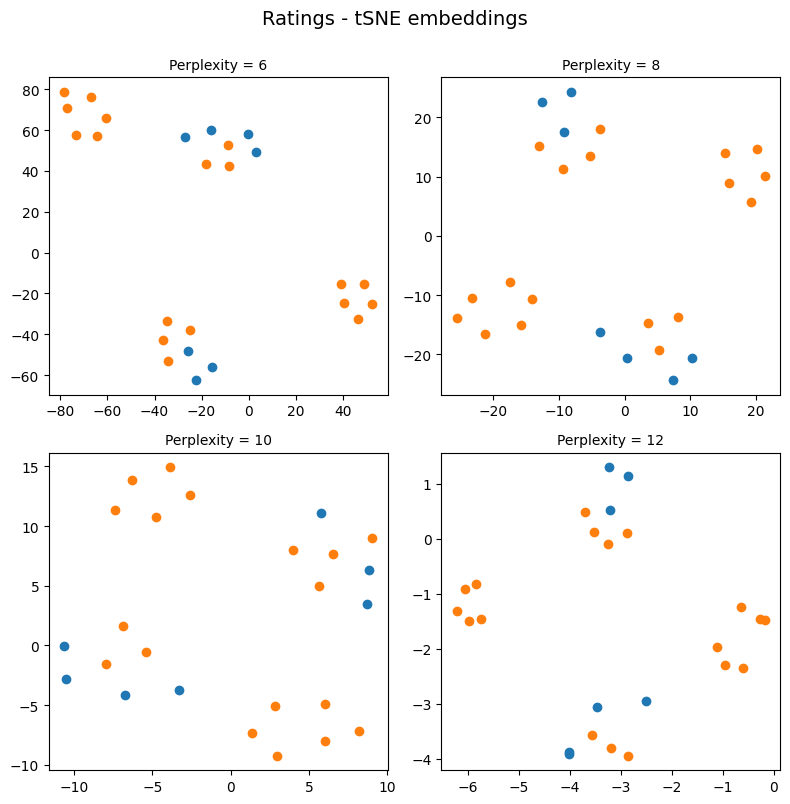

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

raw_data = ratings
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
group = ['Q', 'B', 'R', 'C', 'M', 'U', 'O']

raw_data_group = raw_data.loc[group]
group_size = raw_data_group.shape[0]
raw_data_other = raw_data.drop(group)
grouped_data = pd.concat([raw_data_group, raw_data_other])
print(grouped_data)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ratings - tSNE embeddings', fontsize=14, position=(0.5, 1.0))
perplexities = [6, 8, 10, 12]
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(grouped_data.values)
    embedded_group = embedding[:group_size, :]
    embedded_other = embedding[group_size:, :]
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title(f'Perplexity = {p}', fontsize=10)
    sub.scatter(embedded_group[:, 0], embedded_group[:, 1])
    sub.scatter(embedded_other[:, 0], embedded_other[:, 1])
    # for i, name in enumerate(normalised_data.index):
    #     sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

# 8. t-SNE Clustered Ratings

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
cluster0 = ['A', 'E', 'G', 'J', 'K', 'X']
cluster1 = ['D', 'H', 'L', 'S', 'T']
cluster2 = ['C', 'I', 'P', 'Q', 'U', 'V', 'Y']
cluster3 = ['B', 'F', 'M', 'N', 'O', 'R', 'W']


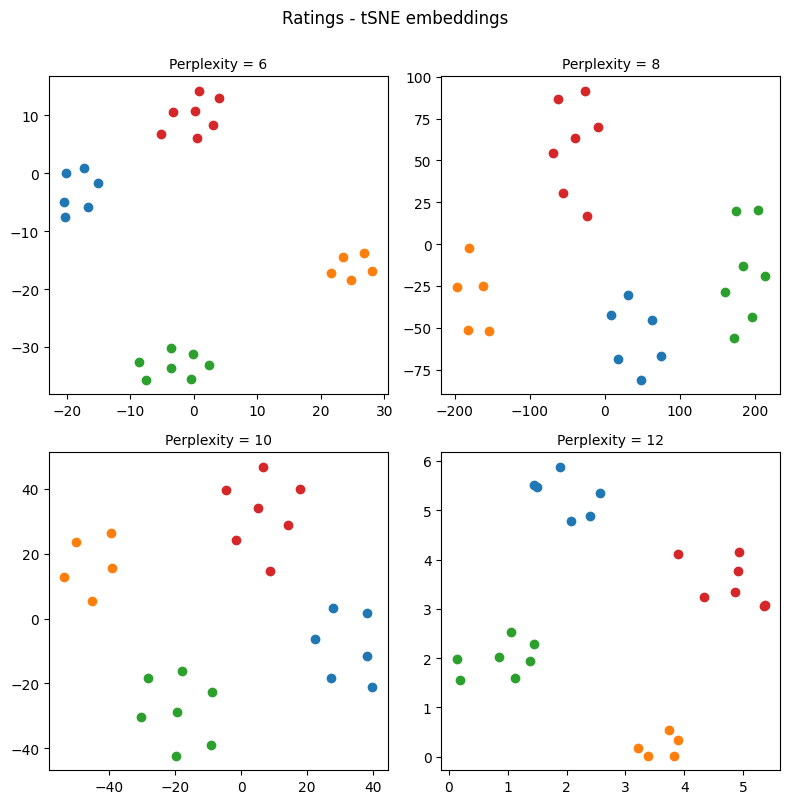

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

k = 4
raw_data = ratings
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = False
perplexities = [6, 8, 10, 12]

clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
raw_data['label'] = k_means.fit_predict(raw_data)
for c in range(k):
    cluster = raw_data[raw_data['label'] == c]
    print(f'cluster{c} = {list(cluster.index)}')
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ratings - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title(f'Perplexity = {p}', fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1])
    if annotate:
        for i, name in enumerate(clustered_data.index):
            sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

# 9. Radar Plot Low Ratings Overlaid

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
A  0.227459  0.258197  0.776639  0.274227  0.308489  0.262605  0.270833   
B  0.682377  0.756148  0.303279  0.389691  0.296066  0.579832  0.437500   
C  0.331967  0.409836  0.795082  0.781443  0.795031  0.777311  0.883333   
D  0.934426  1.000000  0.647541  0.936082  0.973085  0.878151  0.943750   
E  0.297131  0.284836  0.729508  0.342268  0.267081  0.338235  0.304167   

   Rating 8  Rating 9  Rating 10  
A  0.220833  0.241237   0.383197  
B  0.962500  0.661856   0.655738  
C  0.466667  0.424742   0.288934  
D  0.585417  0.927835   0.938525  
E  0.245833  0.282474   0.282787  


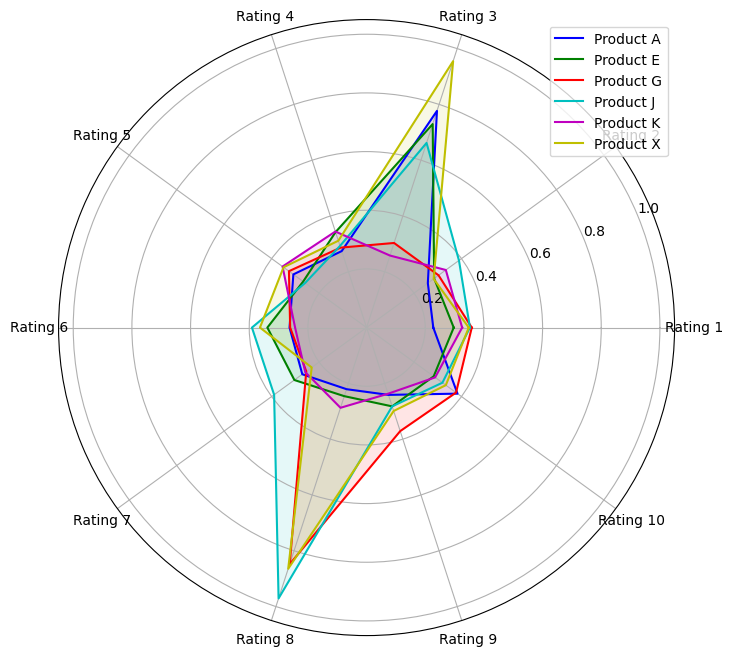

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

normalised_data = ratings / ratings.max()
print(normalised_data.head())

selected = ['A', 'E', 'G', 'J', 'K', 'X']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Product ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

# 10. Radar Plot High Ratings Overlaid

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
A  0.227459  0.258197  0.776639  0.274227  0.308489  0.262605  0.270833   
B  0.682377  0.756148  0.303279  0.389691  0.296066  0.579832  0.437500   
C  0.331967  0.409836  0.795082  0.781443  0.795031  0.777311  0.883333   
D  0.934426  1.000000  0.647541  0.936082  0.973085  0.878151  0.943750   
E  0.297131  0.284836  0.729508  0.342268  0.267081  0.338235  0.304167   

   Rating 8  Rating 9  Rating 10  
A  0.220833  0.241237   0.383197  
B  0.962500  0.661856   0.655738  
C  0.466667  0.424742   0.288934  
D  0.585417  0.927835   0.938525  
E  0.245833  0.282474   0.282787  


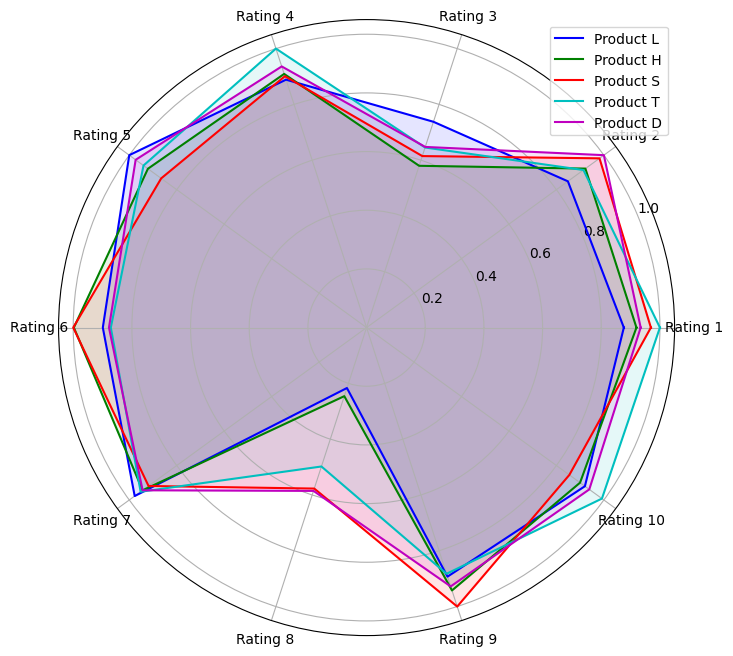

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

normalised_data = ratings / ratings.max()
print(normalised_data.head())

selected = ['L', 'H', 'S', 'T', 'D']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Product ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

# 11. Radar Plot Cluster 3 Ratings Overlaid

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
A  0.227459  0.258197  0.776639  0.274227  0.308489  0.262605  0.270833   
B  0.682377  0.756148  0.303279  0.389691  0.296066  0.579832  0.437500   
C  0.331967  0.409836  0.795082  0.781443  0.795031  0.777311  0.883333   
D  0.934426  1.000000  0.647541  0.936082  0.973085  0.878151  0.943750   
E  0.297131  0.284836  0.729508  0.342268  0.267081  0.338235  0.304167   

   Rating 8  Rating 9  Rating 10  
A  0.220833  0.241237   0.383197  
B  0.962500  0.661856   0.655738  
C  0.466667  0.424742   0.288934  
D  0.585417  0.927835   0.938525  
E  0.245833  0.282474   0.282787  


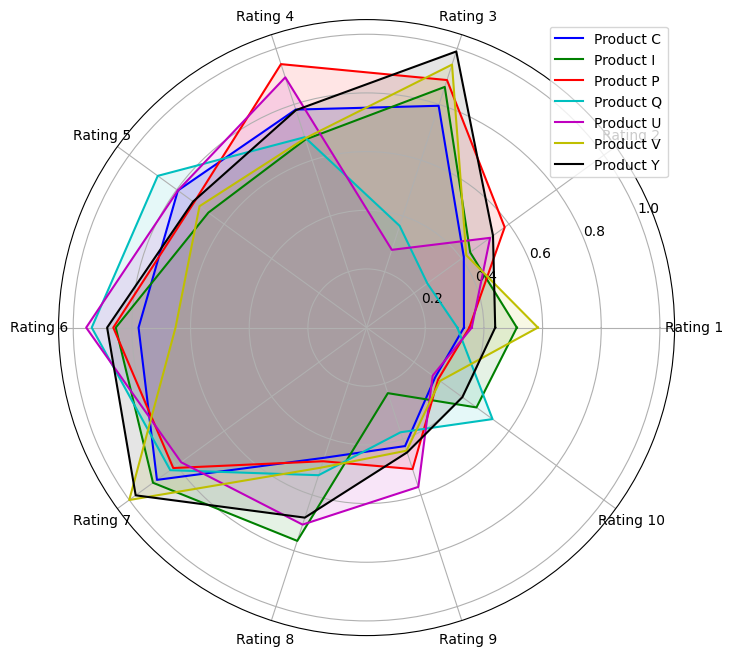

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

normalised_data = ratings / ratings.max()
print(normalised_data.head())

selected = ['C', 'I', 'P', 'Q', 'U', 'V', 'Y']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Product ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

# 12. Radar Plot Cluster 4 Ratings Overlaid

K    1.420
A    1.563
E    1.635
G    1.785
J    2.084
X    2.101
Q    2.748
B    2.771
R    2.773
C    2.878
M    2.885
U    2.966
O    2.969
V    3.015
F    3.062
I    3.079
P    3.122
W    3.227
N    3.258
Y    3.317
L    3.999
H    4.010
S    4.203
T    4.211
D    4.244
dtype: float64
   Rating 1  Rating 2  Rating 3  Rating 4  Rating 5  Rating 6  Rating 7  \
A  0.227459  0.258197  0.776639  0.274227  0.308489  0.262605  0.270833   
B  0.682377  0.756148  0.303279  0.389691  0.296066  0.579832  0.437500   
C  0.331967  0.409836  0.795082  0.781443  0.795031  0.777311  0.883333   
D  0.934426  1.000000  0.647541  0.936082  0.973085  0.878151  0.943750   
E  0.297131  0.284836  0.729508  0.342268  0.267081  0.338235  0.304167   

   Rating 8  Rating 9  Rating 10  
A  0.220833  0.241237   0.383197  
B  0.962500  0.661856   0.655738  
C  0.466667  0.424742   0.288934  
D  0.585417  0.927835   0.938525  
E  0.245833  0.282474   0.282787  


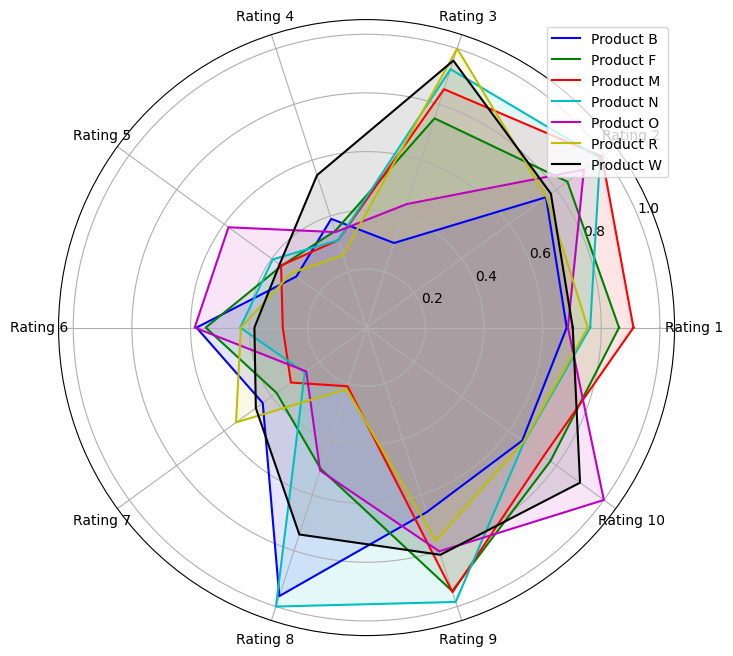

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ratings = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/Ratings.csv', index_col=0)
print(ratings.mean(axis=1).sort_values())

normalised_data = ratings / ratings.max()
print(normalised_data.head())

selected = ['B', 'F', 'M', 'N', 'O', 'R', 'W']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Product ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

# 13. t-SNE Summary Data

   Price  Profit   Sales  Marketing  Cost
A     21       6  175173      21000    15
B     28      16    4489       3000    12
C     43       2    3649       3000    41
D     47       2   18672      42000    45
E     38      14   17449      13000    24
cluster0 = ['B', 'C', 'E', 'I', 'N', 'R', 'V', 'X', 'Y']
cluster1 = ['A', 'F', 'L']
cluster2 = ['G', 'H', 'J', 'S', 'W']
cluster3 = ['D', 'K', 'M', 'O', 'P', 'Q', 'T', 'U']


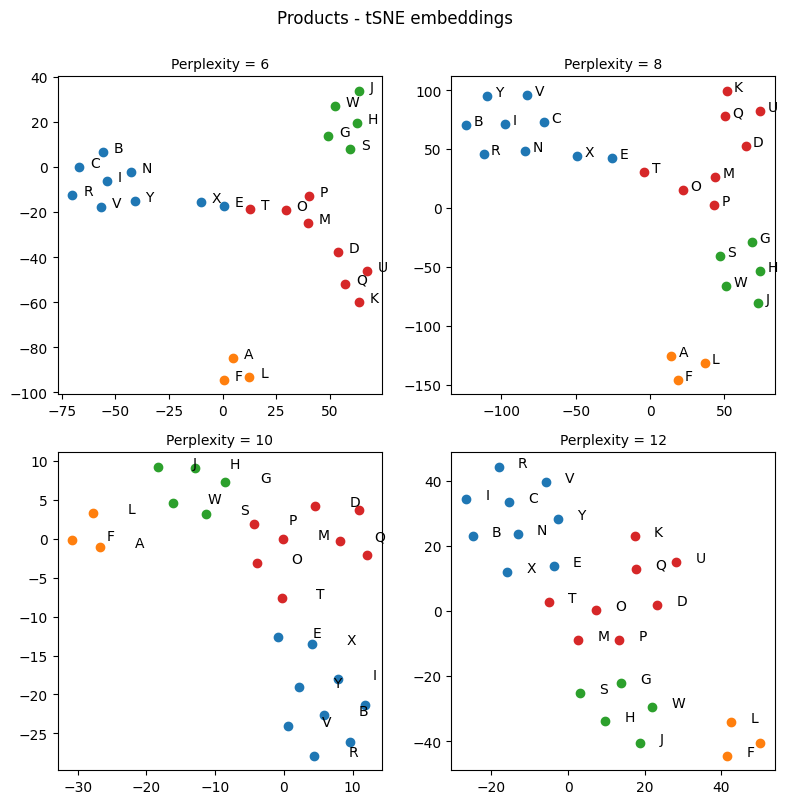

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/DailySales.csv', index_col=0)

marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv', index_col=0)
price_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv', index_col=0)
profit_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Price'] = price_per_unit.values
summary_data['Profit'] = profit_per_unit.values
summary_data['Sales'] = data.sum().values
summary_data['Marketing'] = marketing_data.values
summary_data['Cost'] = summary_data['Price'] - summary_data['Profit']

print(summary_data.head())

k = 4
raw_data = summary_data
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = True
perplexities = [6, 8, 10, 12]

clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
raw_data['label'] = k_means.fit_predict(raw_data)
for c in range(k):
    cluster = raw_data[raw_data['label'] == c]
    print(f'cluster{c} = {list(cluster.index)}')
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Products - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title(f'Perplexity = {p}', fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1])
    if annotate:
        for i, name in enumerate(clustered_data.index):
            sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

# 14. Radar Plot High Volume Overlaid

   Price  Profit   Sales  Marketing  Cost
A     21       6  175173      21000    15
B     28      16    4489       3000    12
C     43       2    3649       3000    41
D     47       2   18672      42000    45
E     38      14   17449      13000    24
      Price  Profit     Sales  Marketing      Cost
A  0.428571    0.24  0.992695   0.477273  0.333333
B  0.571429    0.64  0.025439   0.068182  0.266667
C  0.877551    0.08  0.020679   0.068182  0.911111
D  0.959184    0.08  0.105813   0.954545  1.000000
E  0.775510    0.56  0.098882   0.295455  0.533333


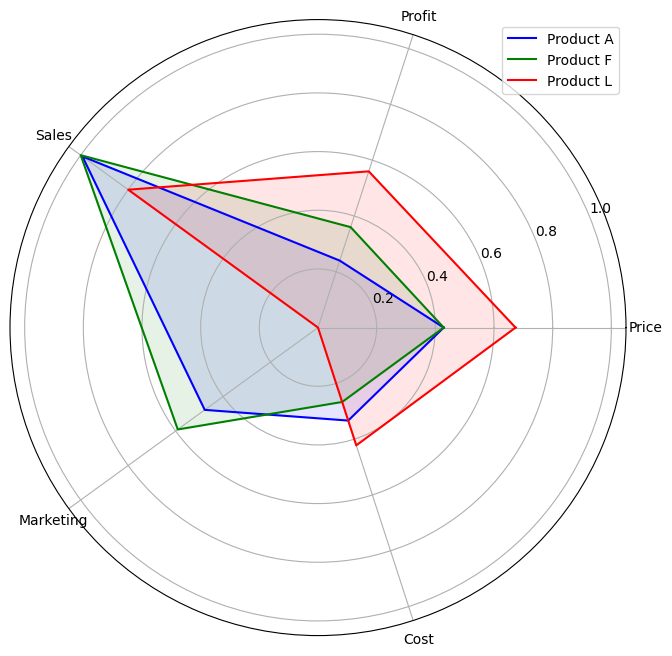

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/DailySales.csv', index_col=0)

marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv', index_col=0)
price_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv', index_col=0)
profit_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Price'] = price_per_unit.values
summary_data['Profit'] = profit_per_unit.values
summary_data['Sales'] = data.sum().values
summary_data['Marketing'] = marketing_data.values
summary_data['Cost'] = summary_data['Price'] - summary_data['Profit']
print(summary_data.head())

normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['A', 'F', 'L']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Product ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

# 15. Radar Plot Medium Volume Overlaid

   Price  Profit   Sales  Marketing  Cost
A     21       6  175173      21000    15
B     28      16    4489       3000    12
C     43       2    3649       3000    41
D     47       2   18672      42000    45
E     38      14   17449      13000    24
      Price  Profit     Sales  Marketing      Cost
A  0.428571    0.24  0.992695   0.477273  0.333333
B  0.571429    0.64  0.025439   0.068182  0.266667
C  0.877551    0.08  0.020679   0.068182  0.911111
D  0.959184    0.08  0.105813   0.954545  1.000000
E  0.775510    0.56  0.098882   0.295455  0.533333


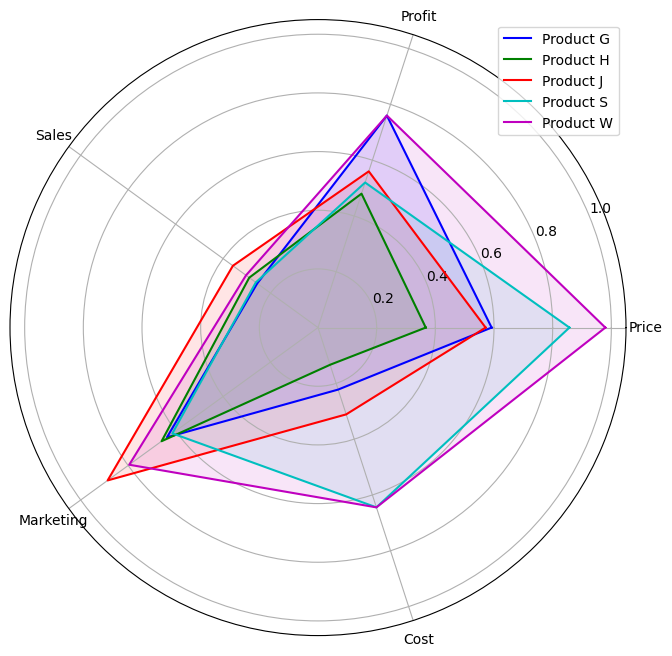

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/DailySales.csv', index_col=0)

marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv', index_col=0)
price_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv', index_col=0)
profit_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Price'] = price_per_unit.values
summary_data['Profit'] = profit_per_unit.values
summary_data['Sales'] = data.sum().values
summary_data['Marketing'] = marketing_data.values
summary_data['Cost'] = summary_data['Price'] - summary_data['Profit']
print(summary_data.head())

normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['G', 'H', 'J', 'M', 'S', 'U', 'W']
selected = ['G', 'H', 'J', 'S', 'W']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Product ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

# 16. Radar Plot Low Volume High Marketing Overlaid

   Price  Profit   Sales  Marketing  Cost
A     21       6  175173      21000    15
B     28      16    4489       3000    12
C     43       2    3649       3000    41
D     47       2   18672      42000    45
E     38      14   17449      13000    24
      Price  Profit     Sales  Marketing      Cost
A  0.428571    0.24  0.992695   0.477273  0.333333
B  0.571429    0.64  0.025439   0.068182  0.266667
C  0.877551    0.08  0.020679   0.068182  0.911111
D  0.959184    0.08  0.105813   0.954545  1.000000
E  0.775510    0.56  0.098882   0.295455  0.533333


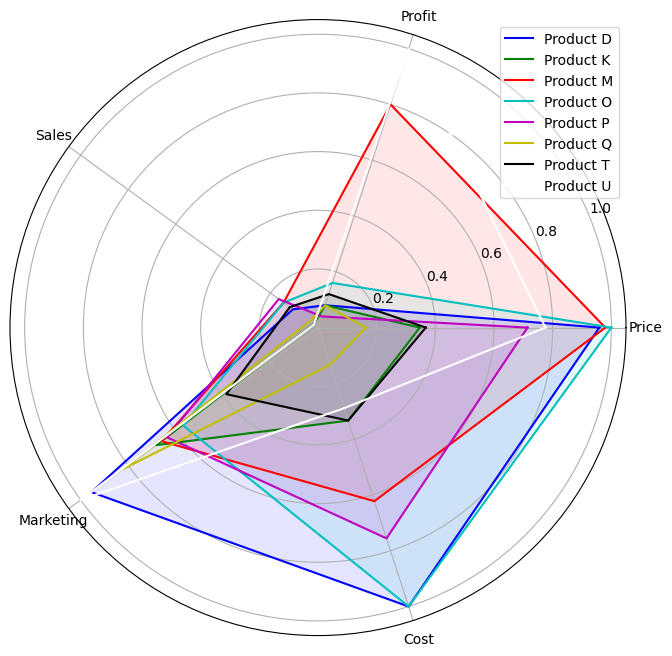

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/DailySales.csv', index_col=0)

marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv', index_col=0)
price_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv', index_col=0)
profit_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Price'] = price_per_unit.values
summary_data['Profit'] = profit_per_unit.values
summary_data['Sales'] = data.sum().values
summary_data['Marketing'] = marketing_data.values
summary_data['Cost'] = summary_data['Price'] - summary_data['Profit']
print(summary_data.head())

normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['C', 'D', 'O', 'P']
selected = ['D', 'K', 'M', 'O', 'P', 'Q', 'T', 'U']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Product ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

# 17. Radar Plot Low Volume Low Marketing Overlaid

   Price  Profit   Sales  Marketing  Cost
A     21       6  175173      21000    15
B     28      16    4489       3000    12
C     43       2    3649       3000    41
D     47       2   18672      42000    45
E     38      14   17449      13000    24
      Price  Profit     Sales  Marketing      Cost
A  0.428571    0.24  0.992695   0.477273  0.333333
B  0.571429    0.64  0.025439   0.068182  0.266667
C  0.877551    0.08  0.020679   0.068182  0.911111
D  0.959184    0.08  0.105813   0.954545  1.000000
E  0.775510    0.56  0.098882   0.295455  0.533333


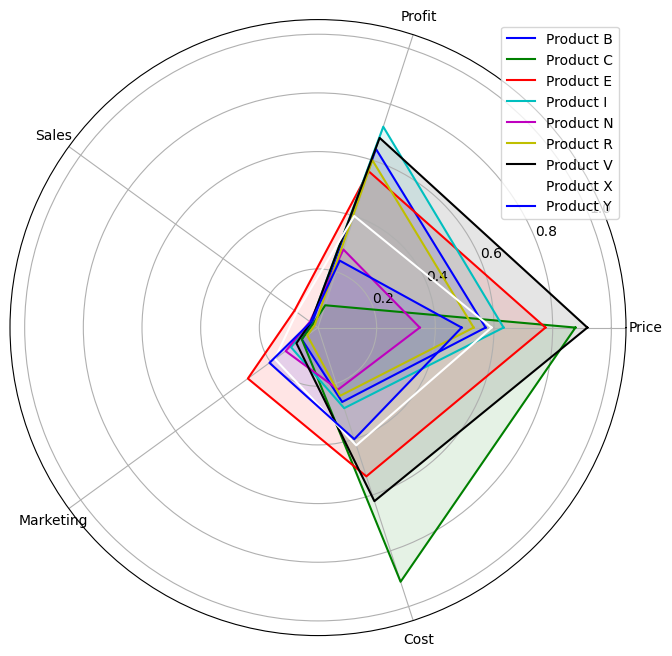

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/DailySales.csv', index_col=0)

marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv', index_col=0)
price_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv', index_col=0)
profit_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Price'] = price_per_unit.values
summary_data['Profit'] = profit_per_unit.values
summary_data['Sales'] = data.sum().values
summary_data['Marketing'] = marketing_data.values
summary_data['Cost'] = summary_data['Price'] - summary_data['Profit']
print(summary_data.head())

normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['K', 'E', 'Q', 'R', 'X', 'T', 'I', 'N', 'B', 'V', 'Y']
selected = ['B', 'C', 'E', 'I', 'N', 'R', 'V', 'X', 'Y']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Product ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()